## Basic EDA notebook 

In [1]:
import glob
import pylab
import random
import numpy as np
import pandas as pd
import pydicom

In [6]:
# data_path = '/home/keil/data/RSNA-pneumonia/stage_1/' #Linux Box
data_path = '/Users/keil/datasets/RSNA-pneumonia/stage_1/' #macOSX
train_img = 'stage_1_train_images/'
train_csv = 'stage_1_train_labels.csv'

In [7]:
df = pd.read_csv(data_path + train_csv)  #df.shape = (28989, 6)
print(df.head())

                              patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1


In [35]:
#selecting a random patientID from training data and peeking at the DICOM's meta-data

rand_patientId = df['patientId'][random.randint(0,28989)] 
rand_dcm_file = data_path + train_img + rand_patientId + '.dcm'
dcm_data = pydicom.read_file(rand_dcm_file) #ingest a random .dcm file

print(dcm_data)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.16741.1517874399.268769
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: 'e79dfd08-2bec-4c51-923b-36e874aa1d66'
(0010, 0020) Patient ID                          LO: 'e79dfd08-2bec-4c51-923b-36e874aa1d66'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'M'
(0010, 1010) Patient'

In [37]:
# taking a look at the DICOM img information

dicom_img_info = dcm_data.pixel_array
print(type(dicom_img_info))
print(dicom_img_info.dtype)
print(dicom_img_info.shape)

<class 'numpy.ndarray'>
uint8
(1024, 1024)


In [ ]:
# Ensure all imaes in train are of the same type and size
# NOTE ---------- DO NOT RUN (see results below in comments. Took ~5 min to run.)

img_sizes = []
img_dtypes = []
img_class = []
for pID in df['patientId'].tolist():
    dcm_file = data_path + train_img + pID + '.dcm'
    dcm_data = pydicom.read_file(dcm_file)
    dicom_img_info = dcm_data.pixel_array
    img_sizes.append(dicom_img_info.shape)
    img_dtypes.append(dicom_img_info.dtype)
    img_class.append(type(dicom_img_info))

assert len(img_sizes) == 28989
assert len(img_dtypes) == 28989
assert len(img_class) == 28989

print(set(img_sizes))
print(set(img_dtypes))
print(set(img_class))

# output:

# {(1024, 1024)}
# {dtype('uint8')}
# {<class 'numpy.ndarray'>}

All images are sccaled to 1024x1024 and have been cast to numoy array 8bit encoding greyscales. 

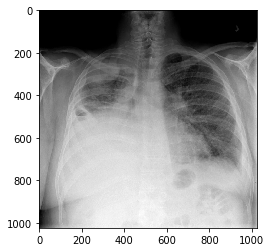

In [39]:
#visualize an image from the above random patient:
pylab.imshow(dicom_img_info, cmap=pylab.cm.gist_gray)
# pylab.axis('off')

In [49]:
# Let's get the ratio of positive to negative pneumonia in the training dataset
label_bool = df['Target'].tolist()
data_count = len(label_bool)
positives = np.sum(label_bool)
print('Positive: {}\nNegative: {}'.format(positives,(data_count-positives)))
print('Ratio of {} to {} pos to neg'.format(positives/positives,np.round(data_count/positives,1)))

Positive: 8964
Negative: 20025
Ratio of 1.0 to 3.2 pos to neg


In [57]:
df[df['patientId'] == 'e79dfd08-2bec-4c51-923b-36e874aa1d66']

,patientId,x,y,width,height,Target
25913,e79dfd08-2bec-4c51-923b-36e874aa1d66,NaN,NaN,NaN,NaN,0


In [22]:
# lets find out how many boxes per patientID
# df.groupby(by=df.patientId).size()
df['patientId'].value_counts()


32408669-c137-4e8d-bd62-fe8345b40e73    4
349f10b4-dc3e-4f3f-b2e4-a5b81448ce87    4
0ab261f9-4eb5-42ab-a9a5-e918904d6356    4
7d674c82-5501-4730-92c5-d241fd6911e7    4
1bf08f3b-a273-4f51-bafa-b55ada2c23b5    4
76f71a93-8105-4c79-a010-0cfa86f0061a    4
3239951b-6211-4290-b237-3d9ad17176db    4
8dc8e54b-5b05-4dac-80b9-fa48878621e2    4
ee820aa5-4804-4984-97b3-f0a71d69702f    4
0d5bc737-03de-4bb8-98a1-45b7180c3e0f    4
31764d54-ea3b-434f-bae2-8c579ed13799    4
b4ea28a7-6386-4660-b499-af4eb17750e1    3
d947215e-c4c5-4907-8d47-0735a0ba4fb9    3
085a6486-c3b3-4ca2-80f1-be07d23e853b    3
17e0f44b-39d6-4e3f-abd0-066fd94ee6de    3
7c086e53-4bad-4bc6-9ff6-292614b69e07    3
34d36b9f-af87-4891-b001-6dc4f5379cb2    3
3218b157-1f46-4da3-863f-9b97ae22308f    3
0bf44996-58da-4a12-8be1-da5c9b009975    3
6d13500d-05ee-4f4f-bc08-aeda019858fe    3
3f167f68-6cde-478d-8e78-9ae22529c22f    3
040a0743-f663-4746-8224-f0e3bacc7ba5    3
78c9b88e-a134-4470-b161-22e4a698206c    3
ec885fc7-04cc-47a5-b971-11ef284c22